# Objective : Regression using TensorFlow
## Agenda 
1. Import Dataset
2. Exploring & Preprocessing Data
3. Splitting Data
4. Normalizing data
5. Model Training
6. Visualizing Loss
7. 

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

### Import data
* From UCI Machine Learning Repository
* 

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 9us/step


'/home/awantik/.keras/datasets/auto-mpg.data'

### Exploring & Preprocessing Data
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [21]:
orig_dataset = pd.read_csv(dataset_path, na_values = "?", comment='\t', sep=" ", skipinitialspace=True, header=None)

In [22]:
orig_dataset.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [23]:
orig_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [24]:
orig_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


* Make a working copy of the dataframe
* Filling the missing values with median

In [80]:
dataset = orig_dataset.copy()

In [81]:
dataset.Horsepower.median()

93.5

In [82]:
dataset['Horsepower'] = dataset.Horsepower.fillna(93.5)

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


* Origin is catagorical value, one hot encoding it

In [84]:
dataset.Origin.value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [85]:
res = keras.utils.to_categorical(dataset.Origin)

In [86]:
res

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [87]:
res = res[:,1:]

In [88]:
res.sum(axis=0)

array([249.,  70.,  79.], dtype=float32)

In [89]:
df = pd.DataFrame(res, columns=['Assam','Karnataka','Delhi'])

In [90]:
df.head()

,Assam,Karnataka,Delhi
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [91]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [92]:
en_dataset = pd.concat([dataset, df], axis=1)

In [94]:
origin = en_dataset.pop('Origin')

In [95]:
en_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Assam,Karnataka,Delhi
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


* Inspect the data

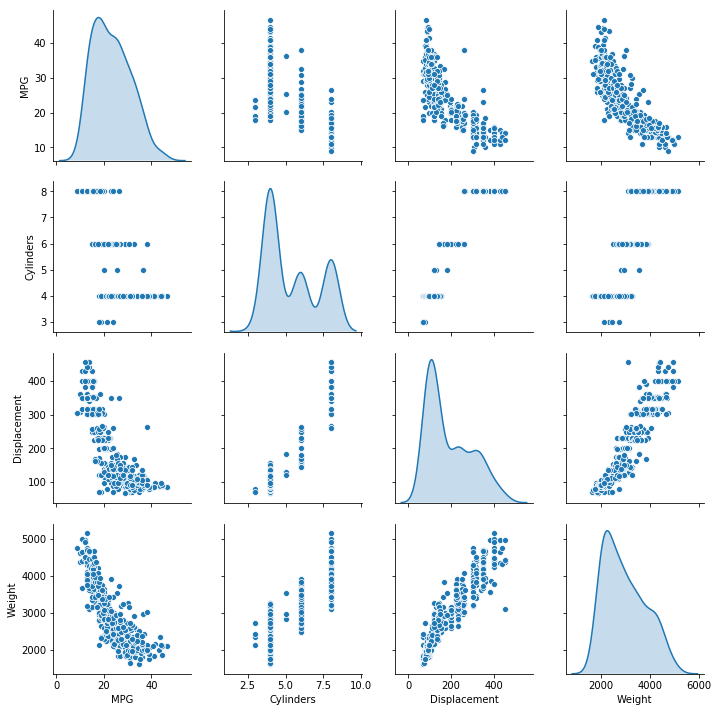

In [97]:
sns.pairplot(en_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [100]:
en_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Assam,Karnataka,Delhi
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### Splitting data for feature & target

In [101]:
label = en_dataset.pop('MPG')

In [102]:
from sklearn.model_selection import train_test_split

In [106]:
trainX, testX, trainY, testY = train_test_split(en_dataset,label)

### Normalize the data
* Encoding & Normalization has to happen to production data as well

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
ss = StandardScaler()

In [112]:
trainX_ss = ss.fit_transform(trainX)

In [114]:
testX_ss = ss.transform(testX)

### Build Model

In [117]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(en_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [124]:
model = build_model()

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [135]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
        print('.', end='')

EPOCHS = 1000
model = build_model()

history = model.fit(  trainX_ss, trainY, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

### Visualizing Loss & its relation with epoch

In [136]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [137]:
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,574.348564,22.755972,574.348572,566.414349,22.410069,566.414307,0
1,525.038849,21.642097,525.038818,515.914530,21.252651,515.914490,1
2,475.055804,20.462605,475.055817,461.153766,19.930086,461.153778,2
3,419.501669,19.101885,419.501648,398.709642,18.372276,398.709625,3
4,358.258808,17.489204,358.258759,333.924428,16.600426,333.924408,4


In [138]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.876667,1.012814,1.876667,6.662817,2.019733,6.662817,995
996,1.686289,0.919702,1.686289,6.831384,2.039980,6.831384,996
997,1.722600,0.929385,1.722600,7.671730,2.173389,7.671730,997
998,1.700696,0.935780,1.700696,7.672377,2.164740,7.672378,998
999,1.669201,0.904097,1.669201,6.763944,1.999091,6.763944,999


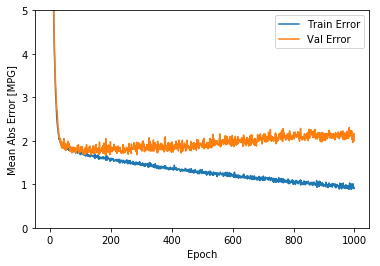

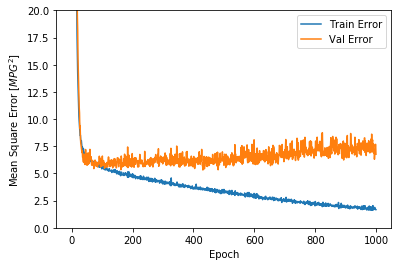

In [139]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

### Optimizing Iterations
* Let's update the model.fit call to automatically stop training when the validation score doesn't improve. 
* We'll use an EarlyStopping callback that tests a training condition for every epoch.


.......................................................

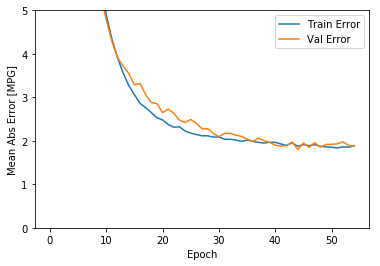

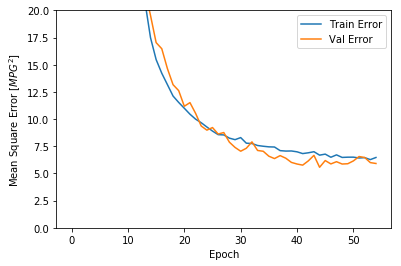

In [140]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(trainX_ss, trainY, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)